In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Load needed libraries
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
5.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
import keras #helps for ANN model construction
import tensorflow as tf #helps for ANN model construction
from sklearn.preprocessing import MinMaxScaler #helps for data normalization
import sklearn.metrics #to calculate evaluation metrics

#1.Load and Visualize Data (using the pandas package)

In [ ]:
movies_data = pd.read_csv('/content/drive/MyDrive/data/movies_final.csv', encoding='latin1')  #Load data with the corresponding path in google drive

#70/30 split
training_movies = pd.read_csv('/content/drive/MyDrive/data/training_movies.csv')

testing_movies = pd.read_csv('/content/drive/MyDrive/data/testing_movies.csv')

In [ ]:
print (movies_data.columns) # Names of columns

Index(['Title', 'Duration', 'Budget', 'Reviews_by_Users', 'IMDB_Score',
       'Gross_Earnings'],
      dtype='object')


In [ ]:
print (movies_data.head())  # Display of the first few samples

                   Title  Duration    Budget  Reviews_by_Users  IMDB_Score  \
0         102 Dalmatians       100  85000000                77         4.8   
1                28 Days       103  43000000               194         6.0   
2              3 Strikes        82   6000000                10         4.0   
3               Aberdeen       106   6500000                35         7.3   
4  All the Pretty Horses       220  57000000               183         5.8   

   Gross_Earnings  
0        66941559  
1        37035515  
2         9821335  
3           64148  
4        15527125  


In [ ]:
print (movies_data.info())  # Infomation of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1874 non-null   object 
 1   Duration          1874 non-null   int64  
 2   Budget            1874 non-null   int64  
 3   Reviews_by_Users  1874 non-null   int64  
 4   IMDB_Score        1874 non-null   float64
 5   Gross_Earnings    1874 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 88.0+ KB
None


In [ ]:
print (movies_data.describe()) # Display some statistical results

          Duration        Budget  Reviews_by_Users   IMDB_Score  \
count  1874.000000  1.874000e+03       1874.000000  1874.000000   
mean    106.176094  3.524567e+07        341.581110     6.335379   
std      19.481779  3.892760e+07        438.131094     1.089033   
min      20.000000  2.180000e+02          2.000000     1.900000   
25%      93.000000  9.000000e+06         95.250000     5.700000   
50%     102.000000  2.200000e+07        203.000000     6.500000   
75%     116.000000  5.000000e+07        403.750000     7.100000   
max     280.000000  3.000000e+08       5060.000000     9.000000   

       Gross_Earnings  
count    1.874000e+03  
mean     4.347863e+07  
std      6.397214e+07  
min      4.230000e+02  
25%      4.357694e+06  
50%      2.099017e+07  
75%      5.488744e+07  
max      7.605058e+08  


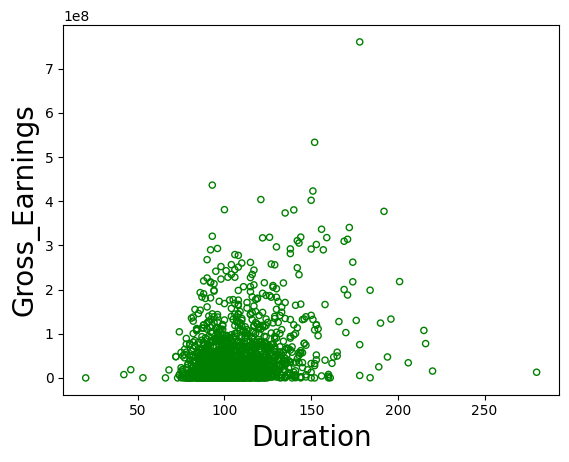

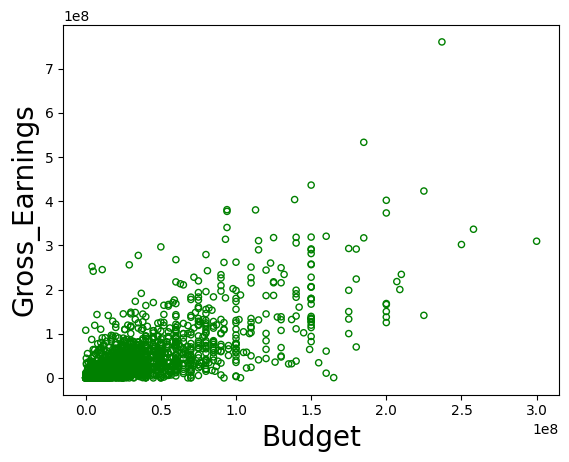

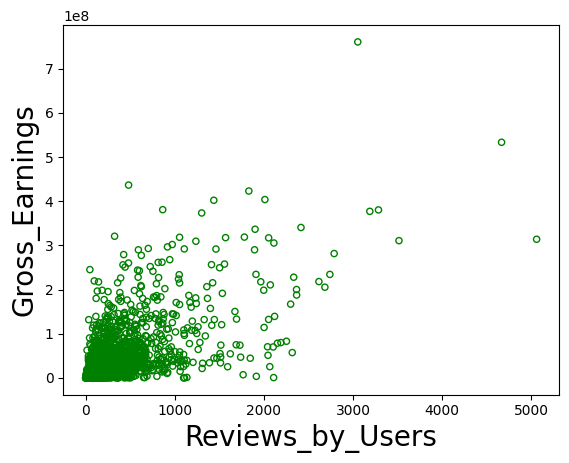

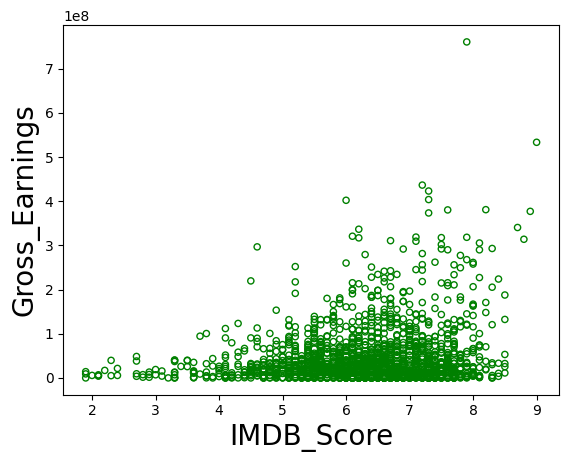

In [ ]:
# Visualization

# removal of title columns

movies_data.drop(movies_data.columns[0], axis=1, inplace=True)

training_movies.drop(training_movies.columns[0], axis=1, inplace=True)

testing_movies.drop(testing_movies.columns[0], axis=1, inplace=True)

for column in movies_data.columns[:-1]:
  plt.scatter(movies_data[column], movies_data['Gross_Earnings'], s=20, marker='o', edgecolor=['green'], c='none')  # Scatter data
  plt.xlabel(column, fontsize=20)
  plt.ylabel('Gross_Earnings', fontsize=20)
  plt.show()

X = movies_data.iloc[:,:-1].values                # input data to be an array
Y = movies_data['Gross_Earnings'].values.reshape(-1,1) #labels which are transformed to a shape of (1460, 1)

##Data Reshape

In [ ]:
#clean training and testing sets (separate X and Y features)

x_train = training_movies.iloc[:, 0:4].values

y_train = training_movies.iloc[:, 4].values

x_test = testing_movies.iloc[:, 0:4].values

y_test = testing_movies.iloc[:, 4].values



print(x_train)
print(x_train.shape)

print("----------")

print(y_train)
print(y_train.shape)


[[8.60e+01 2.80e+06 5.30e+01 6.00e+00]
 [1.03e+02 5.00e+07 2.60e+01 6.90e+00]
 [1.09e+02 3.00e+07 2.21e+02 6.10e+00]
 ...
 [8.80e+01 5.00e+06 5.60e+01 5.60e+00]
 [1.02e+02 5.00e+07 5.80e+01 6.60e+00]
 [8.30e+01 4.50e+07 5.48e+02 5.20e+00]]
(1311, 4)
----------
[  475000   206400 10965209 ...   648183    23106 71277420]
(1311,)


# Data normalisation
We need to perform data normalization using min max scaling to be able to get clearer results

In [ ]:
scaler = MinMaxScaler()   #call the standardation package
scaler.fit(x_train)         #fit the raw data
x_train = scaler.transform(x_train) #normalization of training data
x_test = scaler.transform(x_test)  #normalization of testing data

y_train_max = max(y_train)      #obtain the maximum of training labels for label normalization
y_train = y_train/y_train_max   #normalization of training labels
y_test = y_test/y_train_max     #normalization of testing labels


# DANN model training after DN

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(5, input_shape=(4,)))    # we have 5 neurons for output and 4 neurons for input (SquareFeet)
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(5))                      # we have 5 neurons for output and 8 neurons for input
model.add(keras.layers.Activation("relu"))             # use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(1))                       # we have 1 neuron for output (Gross_Earnings) and 6 neurons for input
model.compile(tf.keras.optimizers.SGD(learning_rate = 6e-2), 'mean_squared_error') # compile the model with a SGD optimizer
model.fit(x_train, y_train, epochs = 100, batch_size = 64, verbose = 2, validation_data = (x_test, y_test))             #train the model

Epoch 1/100
21/21 - 1s - loss: 0.0335 - val_loss: 0.0288 - 1s/epoch - 49ms/step
Epoch 2/100
21/21 - 0s - loss: 0.0212 - val_loss: 0.0278 - 69ms/epoch - 3ms/step
Epoch 3/100
21/21 - 0s - loss: 0.0205 - val_loss: 0.0273 - 69ms/epoch - 3ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0202 - val_loss: 0.0267 - 67ms/epoch - 3ms/step
Epoch 5/100
21/21 - 0s - loss: 0.0199 - val_loss: 0.0263 - 76ms/epoch - 4ms/step
Epoch 6/100
21/21 - 0s - loss: 0.0197 - val_loss: 0.0261 - 72ms/epoch - 3ms/step
Epoch 7/100
21/21 - 0s - loss: 0.0194 - val_loss: 0.0257 - 74ms/epoch - 4ms/step
Epoch 8/100
21/21 - 0s - loss: 0.0192 - val_loss: 0.0254 - 66ms/epoch - 3ms/step
Epoch 9/100
21/21 - 0s - loss: 0.0190 - val_loss: 0.0252 - 78ms/epoch - 4ms/step
Epoch 10/100
21/21 - 0s - loss: 0.0187 - val_loss: 0.0249 - 83ms/epoch - 4ms/step
Epoch 11/100
21/21 - 0s - loss: 0.0184 - val_loss: 0.0246 - 76ms/epoch - 4ms/step
Epoch 12/100
21/21 - 0s - loss: 0.0181 - val_loss: 0.0243 - 70ms/epoch - 3ms/step
Epoch 13/100
21/21 - 0s - 

# DANN model testing

18/18 [==============================] - 0s 3ms/step


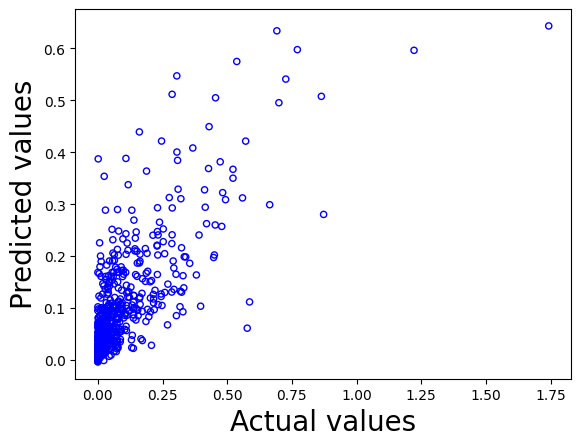

In [ ]:
prediction = model.predict(x_test)    # Predict the testing set

# Visualization
plt.scatter(y_test, prediction, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual values', fontsize=20)
plt.ylabel('Predicted values', fontsize=20)

#uncomment the following code to display axline in the plot
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.show()

# DANN model evaluation
To evaluate this model we are going to use metrics such as RMSE and R^2

In [ ]:
#loss
mse = sklearn.metrics.mean_squared_error(y_test, prediction)
#print("MSE (loss) =", mse)

#RMSE
rmse = np.sqrt(mse)

print("RMSE = ", rmse)

#r-squared

r2 = sklearn.metrics.r2_score(y_test, prediction)
print("R2 = ", r2)

RMSE =  0.10709589953945153
R2 =  0.5565214175160342
